In [ ]:
from pathlib import Path
import datetime as dt
import geopandas as go
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [ ]:
datapath = Path().absolute().parents[1] / "data/AICC_lightning"
files = list(datapath.glob("alaska_lightning_*.json"))

In [ ]:
result = []
for fp in files:
    with open(fp) as src:
        result.extend([item['attributes'] for item in json.load(src)['features']])

result

[{'OBJECTID': 3451346,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749962424000,
  'LOCALDATETIME': 1749933624000,
  'MILLISECONDS': 967,
  'LATITUDE': 65.5571414,
  'LONGITUDE': -131.5363306,
  'AMPLITUDE': -41800.0,
  'GDOP': 7,
  'ERRSEMIMAJOR': 7,
  'ERRSEMIMINOR': 1,
  'ERRELIPSEANGLE': 53,
  'STRIKETIME': '2025/06/14 11:40',
  'STRIKESEQNUMBER': 18753,
  'POLARITY': 'Negative'},
 {'OBJECTID': 3451347,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749963942000,
  'LOCALDATETIME': 1749935142000,
  'MILLISECONDS': 719,
  'LATITUDE': 62.3666019,
  'LONGITUDE': -146.3590426,
  'AMPLITUDE': -32000.0,
  'GDOP': 1,
  'ERRSEMIMAJOR': 1,
  'ERRSEMIMINOR': 1,
  'ERRELIPSEANGLE': 33,
  'STRIKETIME': '2025/06/14 12:05',
  'STRIKESEQNUMBER': 18754,
  'POLARITY': 'Negative'},
 {'OBJECTID': 3451348,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749973249000,
  'LOCALDATETIME': 1749944449000,
  'MILLISECONDS': 853,
  'LA

In [ ]:
strikes = pd.DataFrame.from_records(result)
strikes.drop_duplicates(inplace=True)
strikes['STRIKETIME'] = strikes['STRIKETIME'].astype('datetime64[ns]') 
strikes = strikes.query("STROKETYPE == 'GROUND_STROKE'")  
strikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266664,163353,GROUND_STROKE,0,1752241229000,1752212429000,698,64.014913,-147.564326,59300.0,1,1,1,59,2025-07-10 20:40:00,19911,Positive
266665,163354,GROUND_STROKE,0,1752241279000,1752212479000,483,63.088532,-140.321700,28500.0,6,7,1,-69,2025-07-10 20:41:00,19912,Positive
266667,163357,GROUND_STROKE,0,1752244490000,1752215690000,389,64.138065,-148.158110,19500.0,1,2,1,72,2025-07-10 21:34:00,19915,Positive
266669,163360,GROUND_STROKE,0,1752249304000,1752220504000,392,64.133664,-144.314630,-13400.0,1,2,1,53,2025-07-10 22:55:00,19918,Negative


In [ ]:
dailystrikes = strikes.resample('D', on='STRIKETIME').size()
# dailystrikes.index = dailystrikes.index.date
dailystrikes

STRIKETIME
2025-05-19        8
2025-05-20       13
2025-05-21        4
2025-05-22       10
2025-05-23       36
2025-05-24      162
2025-05-25      676
2025-05-26     1937
2025-05-27     1138
2025-05-28      576
2025-05-29       54
2025-05-30        7
2025-05-31       41
2025-06-01        4
2025-06-02       74
2025-06-03      441
2025-06-04      101
2025-06-05      482
2025-06-06        0
2025-06-07       63
2025-06-08       20
2025-06-09       17
2025-06-10        5
2025-06-11        0
2025-06-12       67
2025-06-13       43
2025-06-14       23
2025-06-15      881
2025-06-16       42
2025-06-17        0
2025-06-18     7876
2025-06-19    12357
2025-06-20    10080
2025-06-21     4337
2025-06-22     2727
2025-06-23     4486
2025-06-24     6939
2025-06-25    10724
2025-06-26     4494
2025-06-27     1739
2025-06-28     1523
2025-06-29     1436
2025-06-30      259
2025-07-01      603
2025-07-02     1151
2025-07-03      244
2025-07-04      627
2025-07-05     1866
2025-07-06     6175
2025-07-0

In [ ]:
sns.set_theme('paper')
sns.set_style('whitegrid')

[Text(13, 0, '01 Jun 2025'),
 Text(27, 0, '15 Jun 2025'),
 Text(43, 0, '01 Jul 2025')]

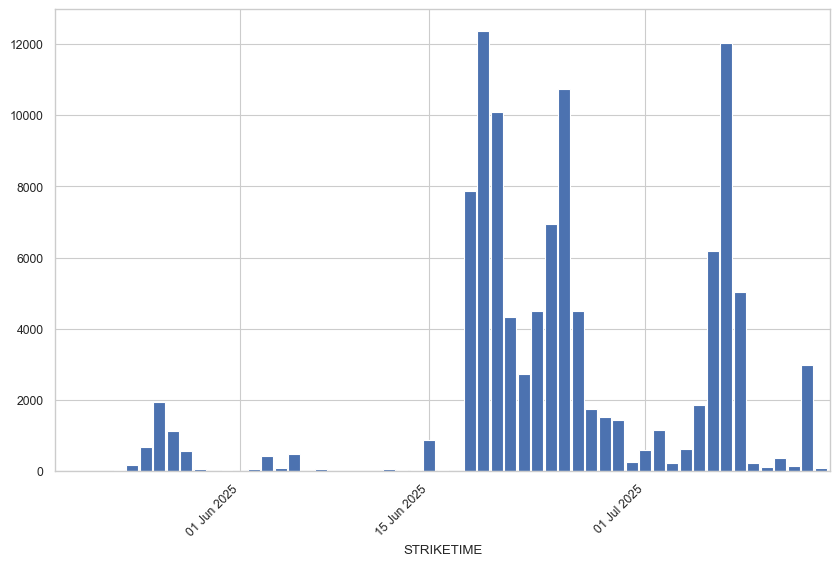

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailystrikes.plot.bar(width=.9)
# ax.xaxis.grid(False)
xticks = pd.date_range(start=dailystrikes.index.min(), end=dailystrikes.index.max(), freq='SMS')
ax.set_xticks(xticks.map(lambda d: dailystrikes.index.get_loc(d)))
ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [ ]:
strikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100427,128114,GROUND_STROKE,0,1751212247000,1751183447000,741,63.031132,-143.422249,-18800.0,1,2,1,-52,2025-06-28 22:50:00,51526,Negative
100428,128115,GROUND_STROKE,0,1751213988000,1751185188000,777,63.988084,-141.869606,-43400.0,8,9,1,-85,2025-06-28 23:19:00,51527,Negative
100429,128117,GROUND_STROKE,0,1751216306000,1751187506000,80,68.516090,-141.659797,-25200.0,10,11,1,50,2025-06-28 23:58:00,51529,Negative
100430,128118,GROUND_STROKE,0,1751217037000,1751188237000,85,63.284858,-135.234105,-48200.0,4,5,1,52,2025-06-29 00:10:00,51530,Negative


In [ ]:
strikes.attrs['title'] = "Ground strikes, 2025, Alaska Lightning Detection Network"
strikes.attrs['creator'] = "Chris Waigl, cwaigl@alaska.edu"
strikes.attrs['contributor'] = "Alaska Interagency Coordination Center (AICC)"
strikes.attrs['source'] = "https://fire.ak.blm.gov/arcgis/rest/services/MapAndFeatureServices/Lightning/FeatureServer"
strikes.attrs['date'] = dt.datetime.now()
strikes.attrs['rights'] = "This data is publicly available from the Bureau of Land Management / Alaska Fire Service. Transformed by the creator of this dataset and made available as open source."


In [ ]:
strikes.to_feather(datapath/"GroundStrikes_2025.fth")

In [ ]:
reloadstrikes = pd.read_hdf(datapath/"GroundStrikes_2025.h5", key='strikes',)

In [ ]:
reloadstrikes.attrs

{}

In [ ]:
strikes.to_hdf(datapath/"GroundStrikes_2025.h5", key='strikes', mode='w', format='table')

In [ ]:
reloadstrikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100427,128114,GROUND_STROKE,0,1751212247000,1751183447000,741,63.031132,-143.422249,-18800.0,1,2,1,-52,2025-06-28 22:50:00,51526,Negative
100428,128115,GROUND_STROKE,0,1751213988000,1751185188000,777,63.988084,-141.869606,-43400.0,8,9,1,-85,2025-06-28 23:19:00,51527,Negative
100429,128117,GROUND_STROKE,0,1751216306000,1751187506000,80,68.516090,-141.659797,-25200.0,10,11,1,50,2025-06-28 23:58:00,51529,Negative
100430,128118,GROUND_STROKE,0,1751217037000,1751188237000,85,63.284858,-135.234105,-48200.0,4,5,1,52,2025-06-29 00:10:00,51530,Negative
